# Diodo semi-condutor
A corrente que flui por um diodo é dada pela equação de Shockley:<br>
$I = I_s\left(\mathrm{e}^{kV/T}-1\right)$<br >
A maioria dos LEDs hoje em dia são compostos por Nitreto de Gálio (GaN) e Nitreto de índio e Gálio (InGaN). Os primeiros LEDs eram feitos de Arseneto de Gálio (GaAs) e Arseneto de Índio e Gálio (InGaAs)

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
def I(V,T,metal):
    ls = 0.01e-6 if metal=="Si" else 2e-6
    k = 11600/2 if metal=="Si" else 11600   #11600 = e/kb 
    return ls*(math.exp(1)**(k*V/T)-1)
V = np.linspace(-2,3,20000)

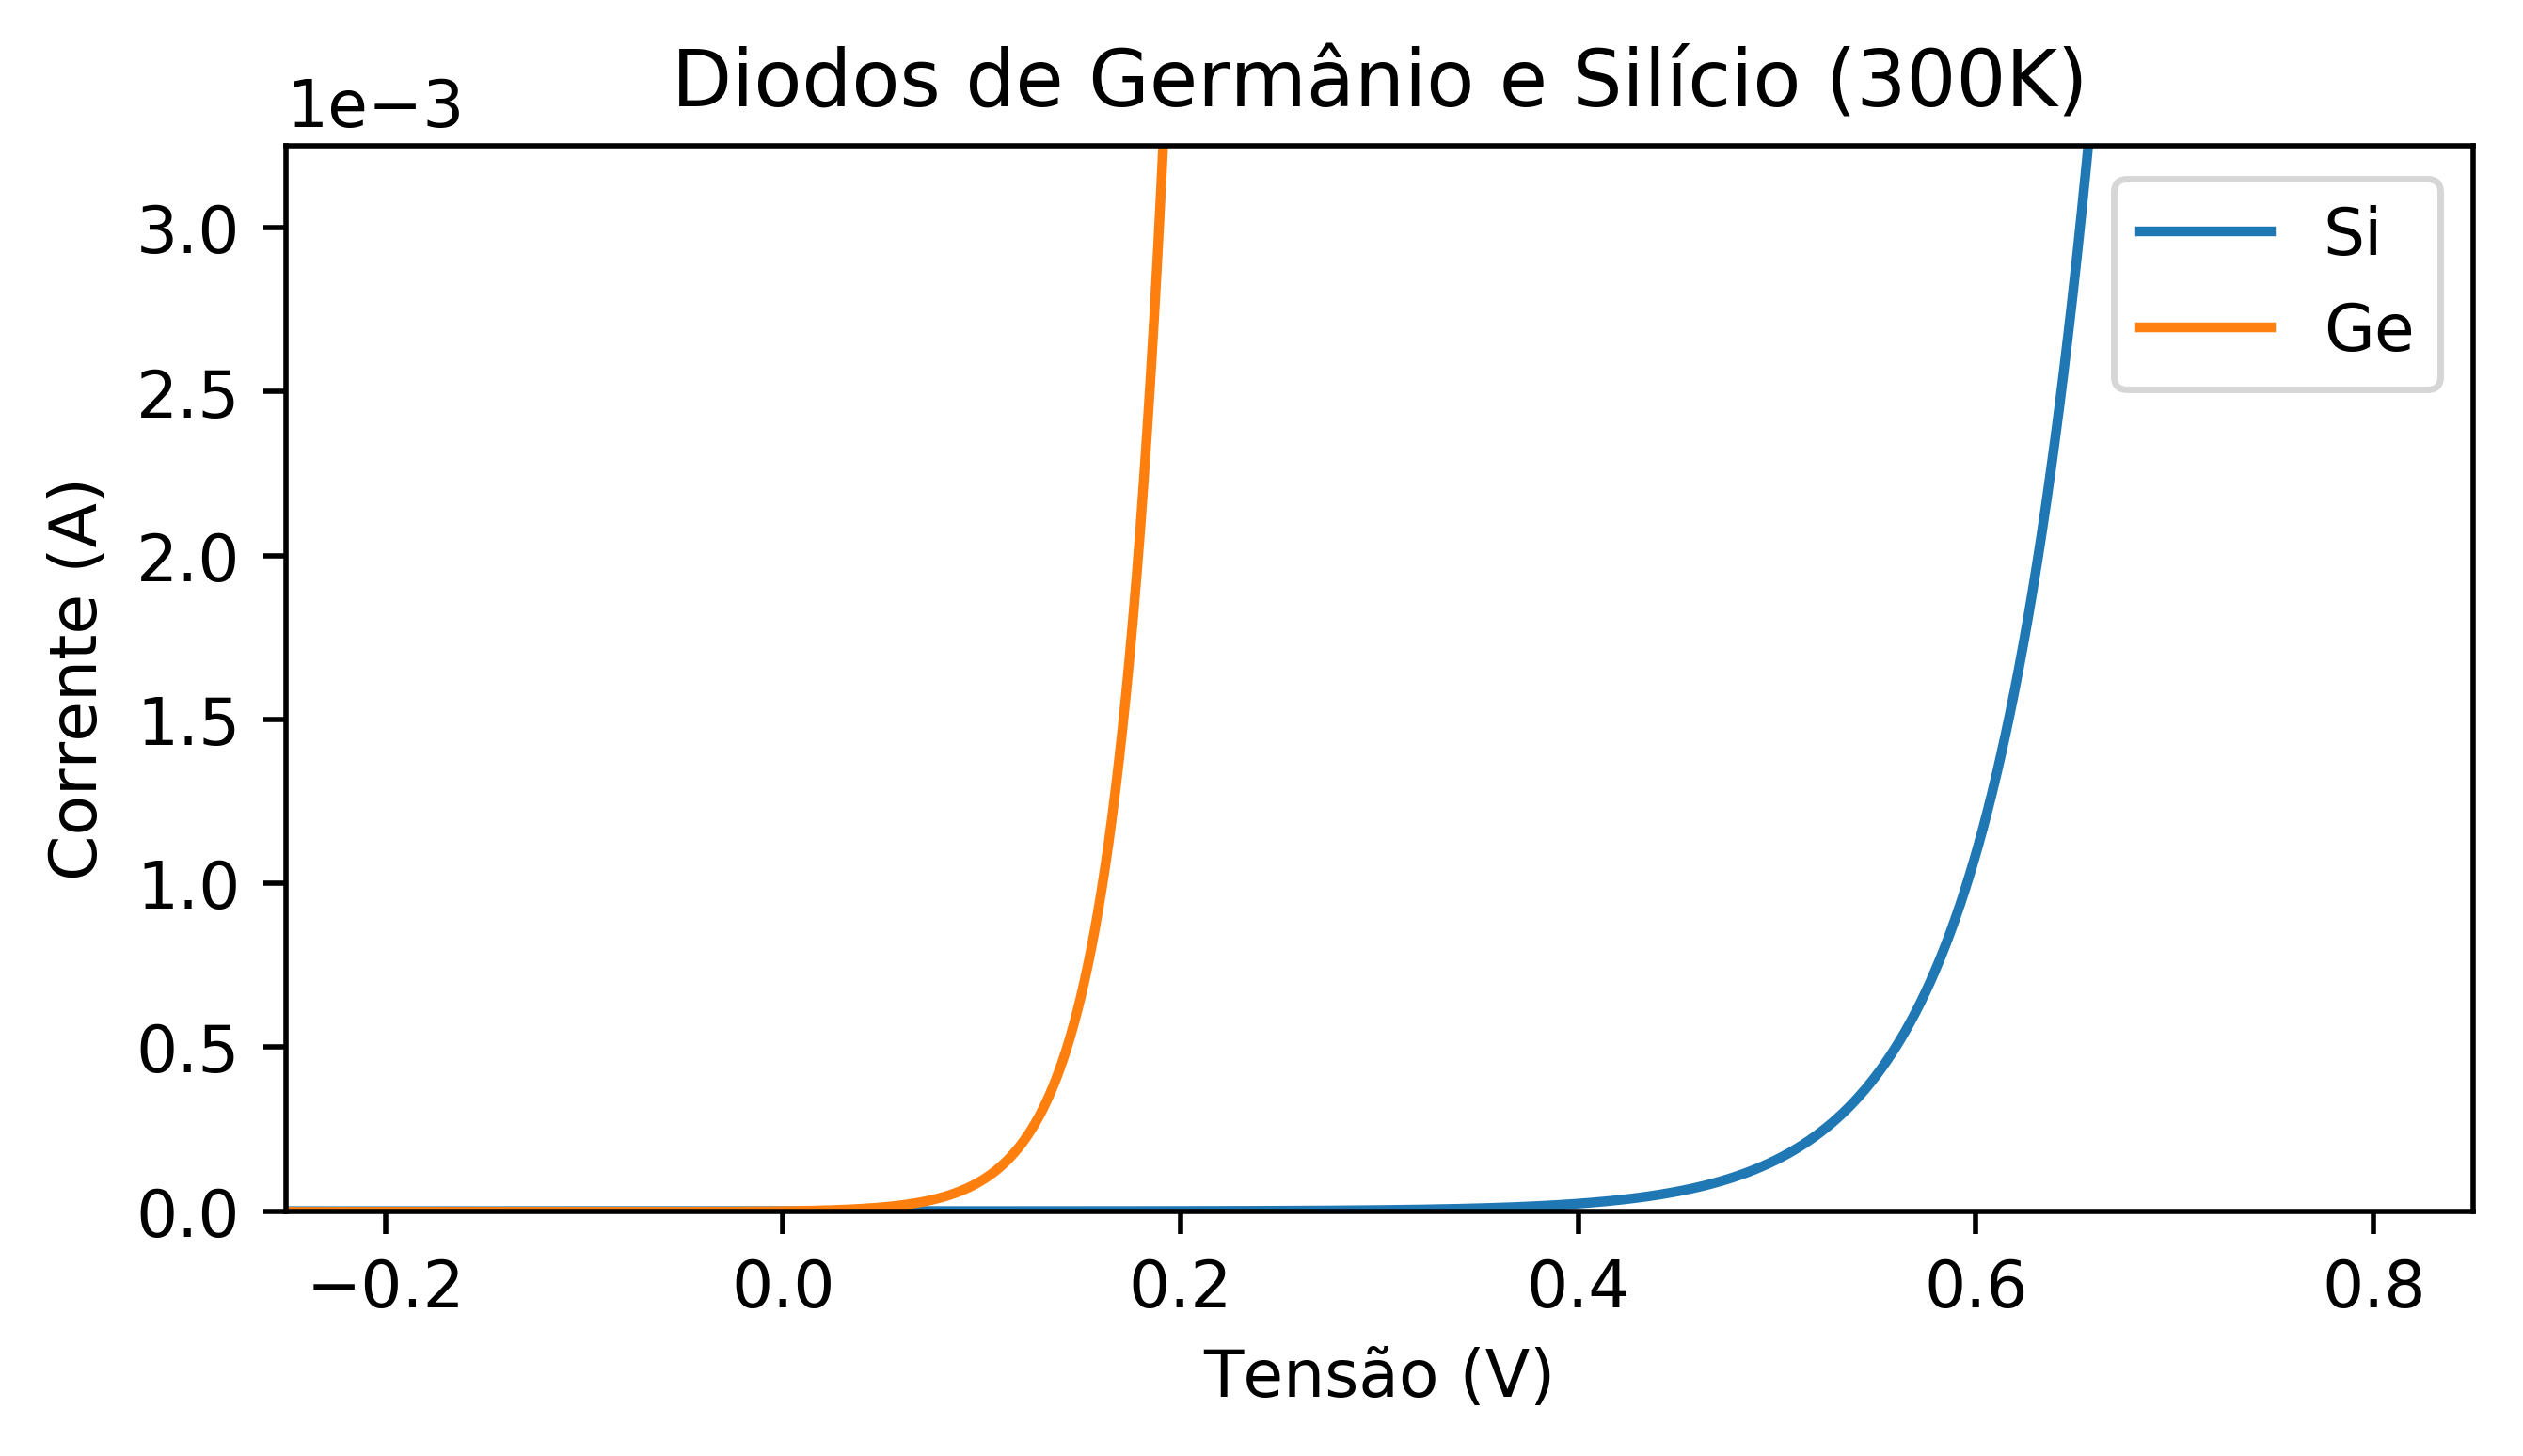

In [101]:
fig = plt.figure(figsize=(6,3),dpi=500)
ax = fig.add_subplot(1,1,1)

ax.plot(V,I(V,300,"Si"),V,I(V,300,"Ge"))
ax.legend(["Si","Ge"])
ax.axis([-0.25, 0.85, -0.000,0.00325])
ax.set_ylabel("Corrente (A)")
ax.set_xlabel("Tensão (V)")
ax.set_title("Diodos de Germânio e Silício (300K)")
ax.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
fig.savefig('diodos.png',bbox_inches='tight')

### Diodo + resistor

Juntando as duas coisas, o que no código faremos numericamente, a corrente por tensão é <br>
$i = \frac{V I_s \left(\exp(\frac{kV}{T})-1\right)}{V+RI_s\left(\exp(\frac{kV}{T})-1\right)}$ <br>

Isso, com $V$ pequeno, se aproxima da curva do diodo; com $V$ grande, da do resistor.

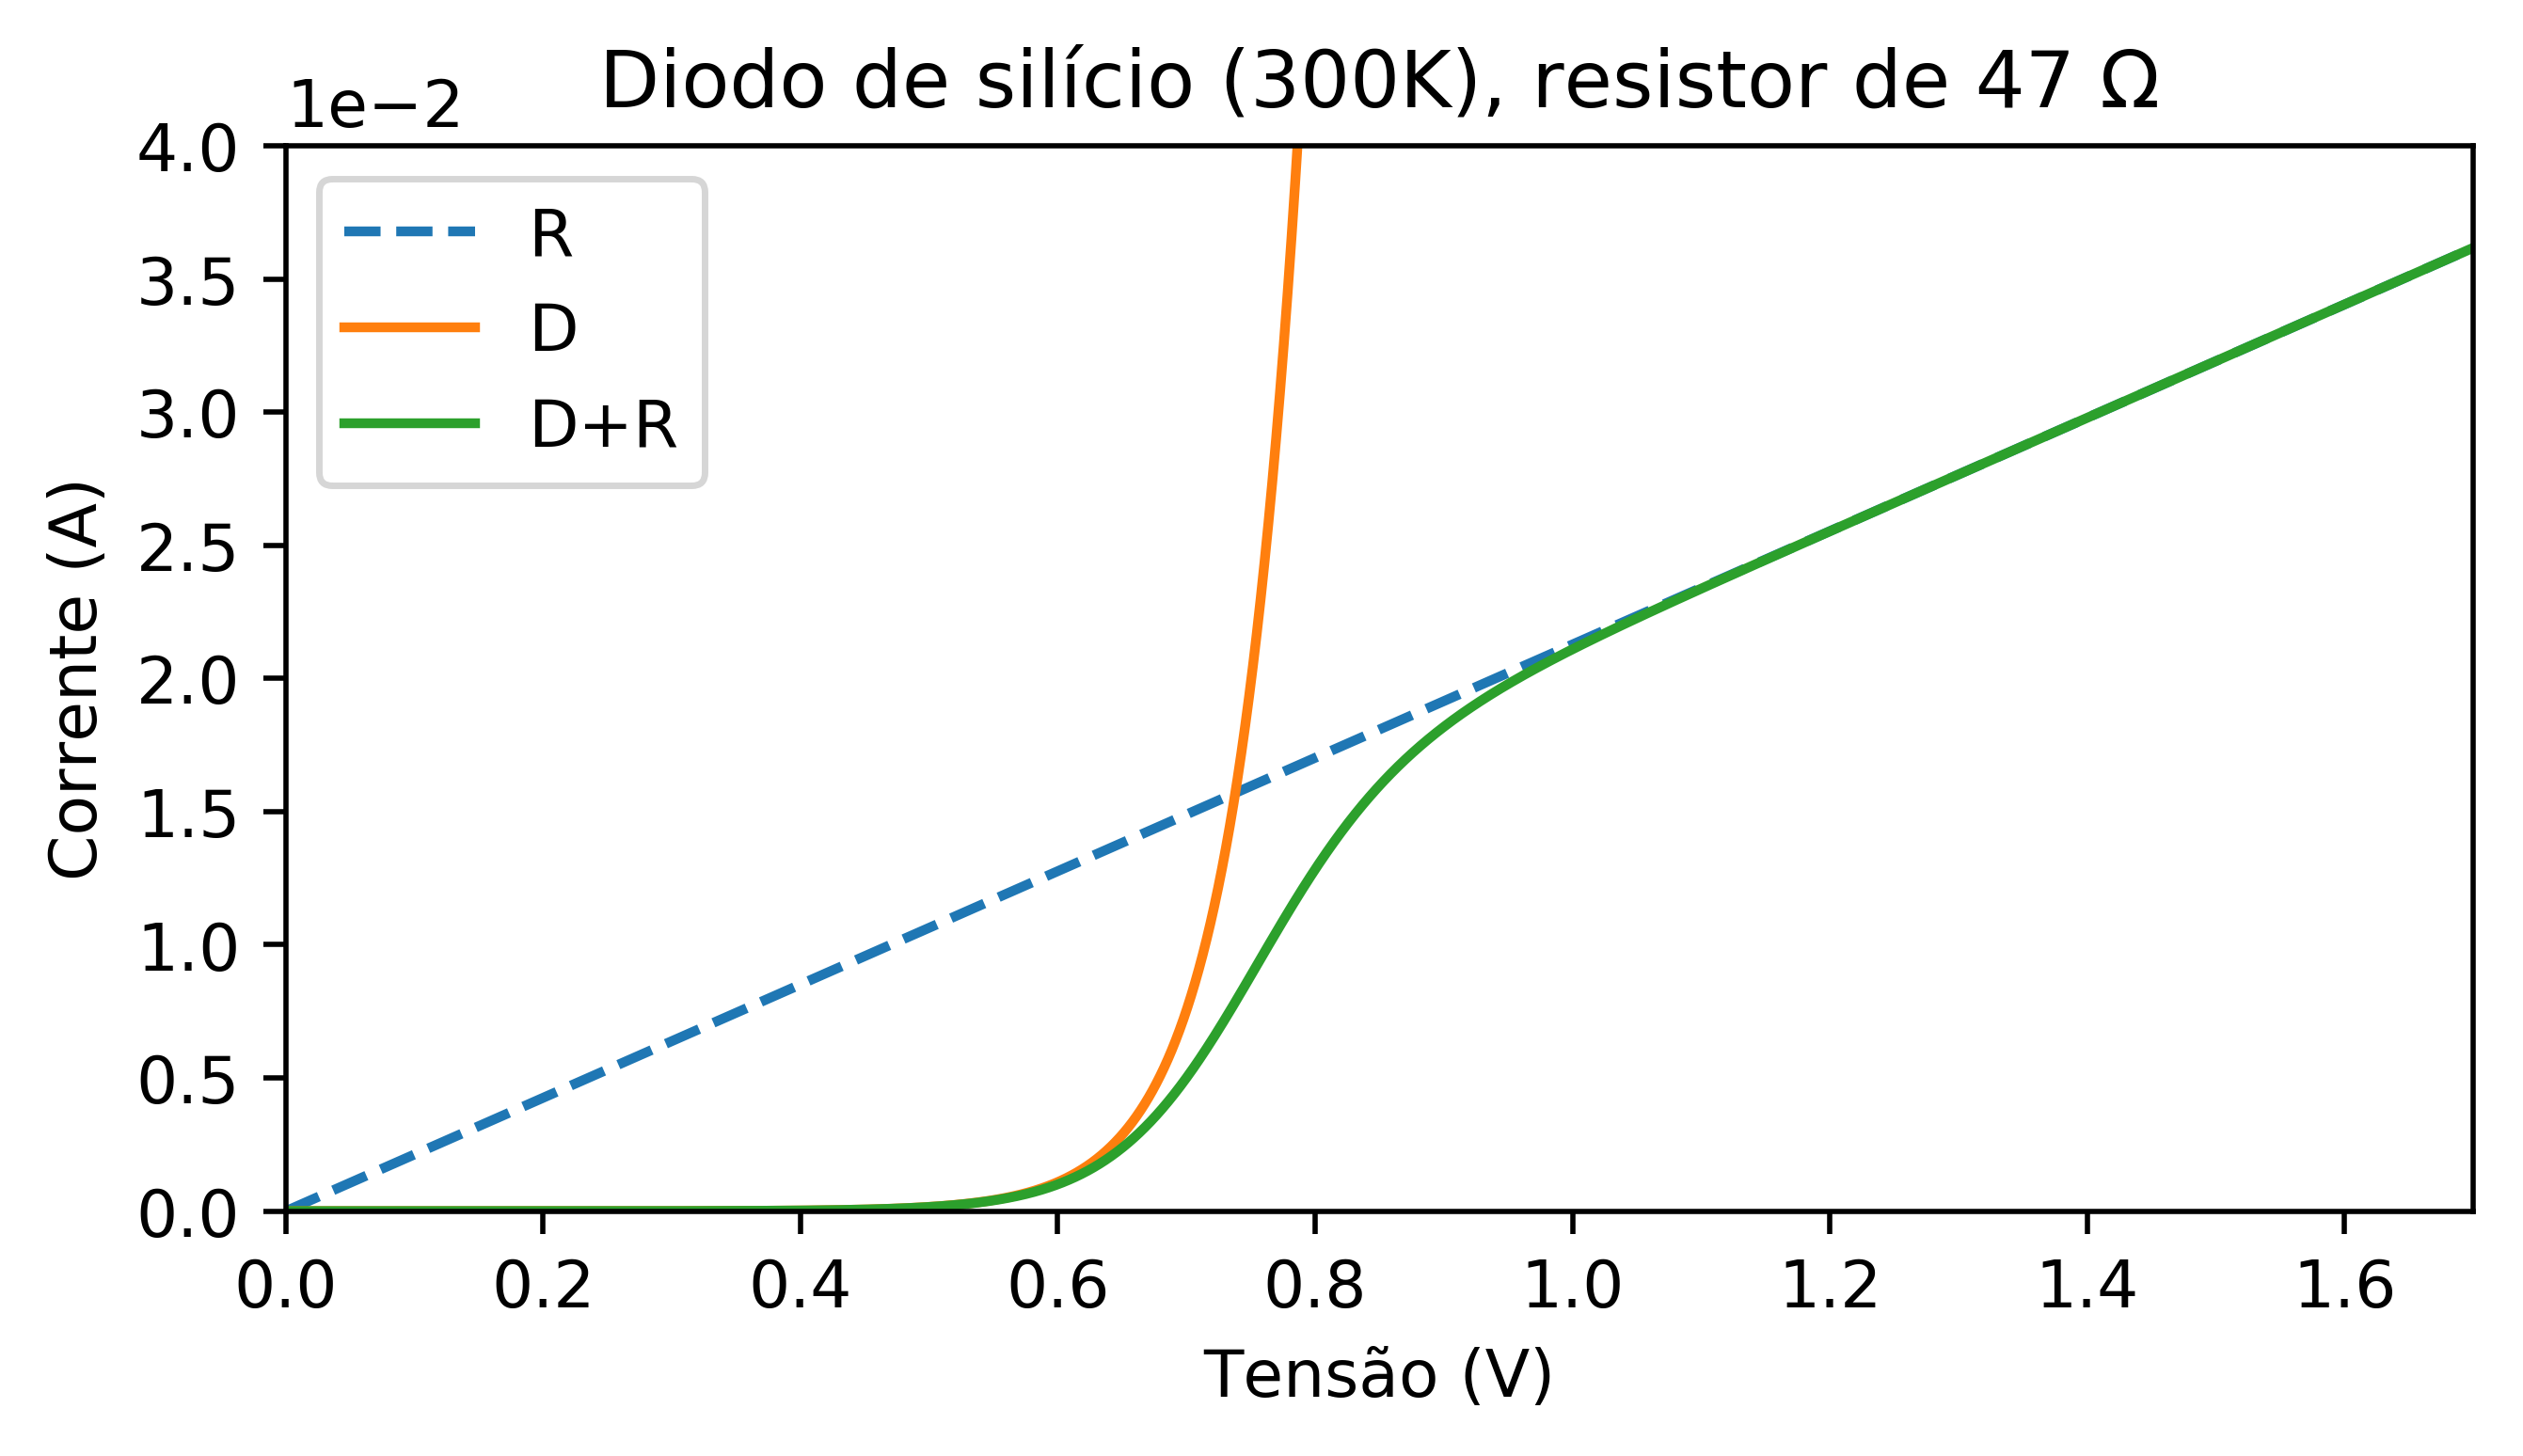

In [102]:
fig = plt.figure(figsize=(6,3),dpi=500)
ax = fig.add_subplot(1,1,1)

ax.plot(V,V/47,'--',V,I(V,300,"Si"),V,V/(V/I(V,300,"Si")+47))
ax.legend(["R","D","D+R"])
ax.axis([0, 1.70, 0, 0.04])
ax.set_ylabel("Corrente (A)")
ax.set_xlabel("Tensão (V)")
ax.set_title("Diodo de silício (300K), resistor de 47 Ω")
ax.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
fig.savefig('diodo+resistor.png',bbox_inches='tight')

# Variação da corrente em função da tensão
Silício passa a conduzir corrente por volta de $V=0.7\mathrm{v}$ enquanto o germânio por volta de $V=0.3\mathrm{v}$

### Variação da corrente em função da temperatura
Para o diodo de silício, sua corrente de saturação reversa ($I_s$) é praticamente dobrada para cada aumento de 10K na temperatura.

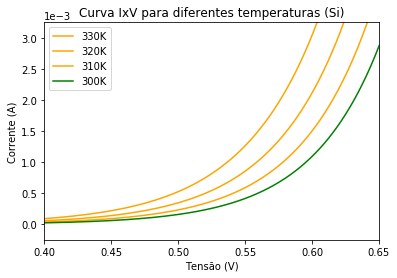

In [4]:
plt.plot(V,2*I(V,310,"Si"),V,4*I(V,320,"Si"),V,8*I(V,330,"Si"),color='orange')
plt.plot(V,I(V,300,"Si"),color='green')
plt.legend(["330K","320K","310K","300K"])
plt.axis([0.4, 0.65, -0.00025,0.00325])
plt.ylabel("Corrente (A)")
plt.xlabel("Tensão (V)")
plt.title("Curva IxV para diferentes temperaturas (Si)")
plt.ticklabel_format(style='sci',axis='y',scilimits=(0,0))

Para uma certa tensão reversa ($V<0$) aplicada ao diodo pode haver corrente (não prevista na equação de Shockley). Esse fenômeno é chamado de efeito Zener. A tensão de pico reversa (PIV = Peak inverse voltage), em volts, do silício situa-se por volta de $V=-1$ enquanto que a do germânio por volta de $V=-400$. O aumento na temperatura aumenta o PIV e traz a região Zener em sentido à $V=0$ 
### Variação da resistência em função da tensão

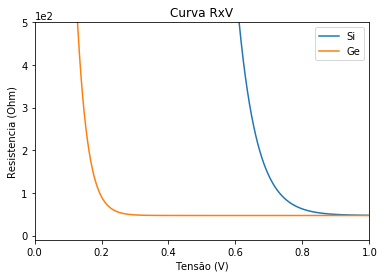

In [5]:
plt.plot(V,V/I(V,300,"Si")+47,V,V/I(V,300,"Ge")+47)
plt.axis([0, 1, -10,500])
plt.legend(["Si","Ge"])
plt.ylabel("Resistencia (Ohm)")
plt.xlabel("Tensão (V)")
plt.title("Curva RxV")
plt.ticklabel_format(style='sci',axis='y',scilimits=(0,0))

Antes de uma tensão $V_m$ a resistência de materiais semi-condutores tem a ordem de grandeza de $10^{12}\Omega$ e passando essa tensão, a resistência cai para a ordem de $10^{-6}\Omega$.

## Geração de dados com ruído pra testar o fitting

/home/solano/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/solano/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/solano/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


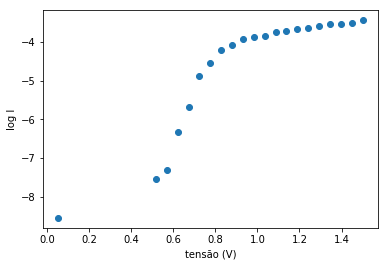

In [85]:
Vn = np.linspace(0,1.5,30)
In = Vn/(Vn/I(Vn,300,"Si")+47) +0.0005*np.random.randn(30)
np.savetxt('teste.csv',np.column_stack((Vn,In,np.log(In))), fmt="%1.4f, %1.10f, %1.10f")
plt.xlabel('tensão (V)')
plt.ylabel('log I')
plt.plot(Vn,np.log(In),'o')

# Lâmpada incandescente

A equação da corrente que passa pela lâmpada por tensão $V$ é <br>
$i = \frac{2 k T_a^3}{\alpha U} \left( -1 + \sqrt{1 + \frac{\alpha U^2}{k R_0 T_a^3}} \right)$ <br>
onde $T_a$ é a temperatura ambiente em kelvins, $R_0$ é a resistência da lâmpada a baixas tensões (no regime ôhmico) e $k = e A \sigma$ com $e$ a emitância da superfície (assumimos 1), $A$ a área (1 cm² parece bom), $\alpha$ é o aumento de resistência por unidade de temperatura e $\sigma$ a constante de Stefan-Boltzmann.

In [86]:
e = 1
A = 0.01
sigma = 5.67e-8
alpha = 2/3
R0 = 100
k = e*A*sigma
Ta = 300
def Il(u):
    return (2*k*Ta**3/(alpha*u))*(-1 + np.sqrt(1+(alpha*u**2/(k*R0*Ta**3))))

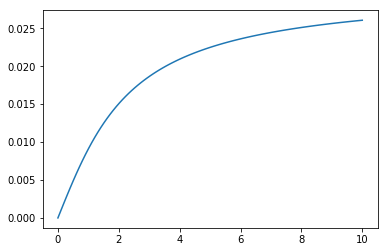

In [93]:
V = np.linspace(0.0001,10,100)

plt.plot(V,Il(V))

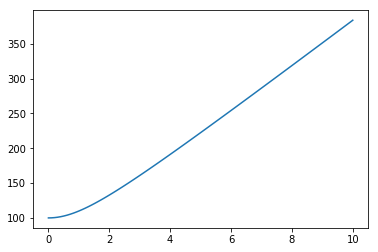

In [94]:
plt.plot(V,V/Il(V))